# Problema 6

Considera el siguiente problema de valor inicial:

>\begin{align*}
      &y'= -50(y - \cos(t)) \quad t\in[0,1],\\
      &y(0)=0.
\end{align*}

Aproximar la solución con $h=1/26$ usando:

1. El método de **Euler explícito**.
2. El método de **Euler implícito**.

Comparar, en ambos casos, con la solución exacta
>\begin{align*}
     y(t)= \frac{50}{2501}*(\sin(t) + 50\cos(t)) - \frac{2500}{2501}e^{-50t}.
\end{align*}

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *

In [3]:
def f(t,y): return -50*(y-cos(t))
a, b = 0, 1
y_a = 0
h = 1/26

# Solución exacta
def y_exacta(t):
    return (50/2501)*(sin(t) + 50*cos(t)) - (2500/2501)*exp(-50*t)

## 1. Método de Euler explícito

Primero calculamos la solución usando el método de Euler explícito.

In [5]:
def euler_explicito(f, y_a, a, b, h):
    """
    Calcula la solución de y'=f(t,y) mediante el mét. Euler.
    
    Argumentos:
           f : Función f(t,y) que defien a la EDO
         y_a : Condición inicial en t=a
        a, b : Extremos del intervalo temporal
           h : Paso de tiempo
    Valores devueltos:
        lista_t : Soporte de puntos, t_i, utilizados
        
    """
    N = int( round((b-a)/h) )
    
    lista_t = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = lista_t[i]
        yn1 = yn + h * f(tn, yn) # Método de Euler
        sol.append(yn1)
        yn = yn1 # Actualizo yn para próxima iteración
    return lista_t, sol

lista_t, sol_euler_explicito = euler_explicito(f, y_a, a, b, h)

## 2. Euler implícito

Ahora calculamos la solución usando el método de Euler implícito.

In [6]:
def euler_implicito(y_a, a, b, h):
    """
    Calcula la solución de y'=f(t,y) mediante el mét. Euler.
    
    Argumentos:
           f : Función f(t,y) que defien a la EDO
         y_a : Condición inicial en t=a
        a, b : Extremos del intervalo temporal
           h : Paso de tiempo
    Valores devueltos:
        lista_t : Soporte de puntos, t_i, utilizados
        
    """
    N = int( round((b-a)/h) )
    
    lista_t = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn1 = lista_t[i+1]
        yn1 = (yn + 50 * h * cos(tn1))/(50 * h + 1) # Método de Euler
        sol.append(yn1)
        yn = yn1 # Actualizo yn para próxima iteración
    return lista_t, sol

lista_t, sol_euler_implicito = euler_implicito(y_a, a, b, h)

## 3. Comparación con la solución exacta

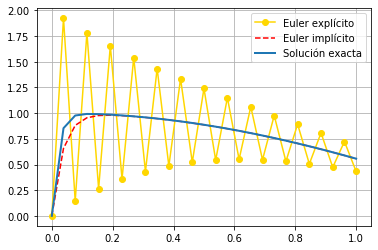

In [13]:
plot(lista_t, sol_euler_explicito, 'o-', c='gold', label='Euler explícito')
plot(lista_t, sol_euler_implicito, '--', c='red', label='Euler implícito')
plot(lista_t, y_exacta(lista_t), lw=2, label=u'Solución exacta')
legend(loc='best')
grid()

In [9]:
errores_ee = abs(array(sol_euler_explicito) - array(y_exacta(lista_t)))
print("Error Euler explícito (norma infinito):", max(errores_ee))
errores_ei = abs(array(sol_euler_implicito) - array(y_exacta(lista_t)))
print("Error Euler implícito (norma infinito):", max(errores_ei))

Error Euler explícito (norma infinito): 1.0695454054206233
Error Euler implícito (norma infinito): 0.19612332936406063


Text(0.5, 1.0, 'Comparación de los errores')

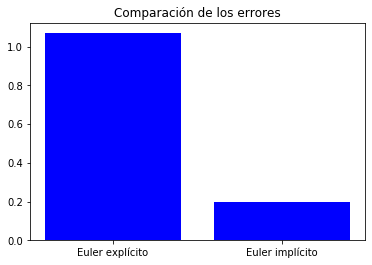

In [10]:
bar([0,1],[max(errores_ee),max(errores_ei)], 
    tick_label=['Euler explícito','Euler implícito'], color='blue')
title("Comparación de los errores")